In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats
import statsmodels.api as sm

from itertools import product

In [2]:
%%time
data = pd.read_csv("yellow_tripdata_2016-05.csv")

Wall time: 1min 47s


In [3]:
data[-10:]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
11836843,2,2016-05-25 15:42:53,2016-05-26 09:47:01,5,0.0,0.000000,0.000000,1,N,0.0,0.0,2,40.5,0.5,0.5,0.0,0.0,0.3,41.8
11836844,2,2016-05-26 10:21:48,2016-05-26 10:21:48,5,0.0,-73.937317,40.764896,1,N,0.0,0.0,2,696.0,0.5,0.5,0.0,0.0,0.3,697.3
11836845,2,2016-05-27 10:56:09,2016-05-27 10:59:34,1,0.0,0.000000,0.000000,1,N,0.0,0.0,2,4.0,0.5,0.5,0.0,0.0,0.3,5.3
11836846,2,2016-05-27 11:37:14,2016-05-27 11:38:25,1,0.0,0.000000,0.000000,1,N,0.0,0.0,2,3.0,0.5,0.5,0.0,0.0,0.3,4.3
11836847,2,2016-05-27 12:00:21,2016-05-27 12:24:15,1,0.0,0.000000,0.000000,1,N,0.0,0.0,2,14.0,0.5,0.5,0.0,0.0,0.3,15.3
11836848,2,2016-05-27 12:24:58,2016-05-27 12:39:38,1,0.0,0.000000,0.000000,1,N,0.0,0.0,2,9.5,0.5,0.5,0.0,0.0,0.3,10.8
11836849,2,2016-05-27 12:44:54,2016-05-27 12:48:17,1,0.0,0.000000,0.000000,1,N,0.0,0.0,2,4.0,0.5,0.5,0.0,0.0,0.3,5.3
11836850,2,2016-05-27 12:48:51,2016-05-27 13:40:56,1,0.0,0.000000,0.000000,1,N,0.0,0.0,2,28.5,0.5,0.5,0.0,0.0,0.3,29.8
11836851,2,2016-05-27 14:18:21,2016-05-27 14:38:13,1,0.0,0.000000,0.000000,1,N,0.0,0.0,2,12.0,0.5,0.5,0.0,0.0,0.3,13.3
11836852,2,2016-05-27 14:38:36,2016-05-27 15:10:15,1,0.0,0.000000,0.000000,1,N,0.0,0.0,2,4886.0,0.5,0.5,0.0,0.0,0.3,4887.3


In [4]:
data.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'pickup_longitude',
       'pickup_latitude', 'RatecodeID', 'store_and_fwd_flag',
       'dropoff_longitude', 'dropoff_latitude', 'payment_type', 'fare_amount',
       'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

2. Проведем фильтрацию: удаляем поездки с

нулевой длительностью

нулевым количеством пассажиров

нулевым расстоянием поездки по счётчику

координатами начала, не попадающими в прямоугольник Нью-Йорка

In [5]:
%%time
data = data[data.tpep_pickup_datetime != data.tpep_dropoff_datetime]
data = data[data.passenger_count != 0]
data = data[data.trip_distance != 0]
data = data[data.pickup_longitude >= -74.25559]
data = data[data.pickup_longitude <= -73.70001]
data = data[data.pickup_latitude >= 40.49612]
data = data[data.pickup_latitude <= 40.91553]

Wall time: 2min 52s


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11626521 entries, 0 to 11836841
Data columns (total 19 columns):
VendorID                 int64
tpep_pickup_datetime     object
tpep_dropoff_datetime    object
passenger_count          int64
trip_distance            float64
pickup_longitude         float64
pickup_latitude          float64
RatecodeID               int64
store_and_fwd_flag       object
dropoff_longitude        float64
dropoff_latitude         float64
payment_type             int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtypes: float64(12), int64(4), object(3)
memory usage: 1.7+ GB


In [7]:
%%time
data.tpep_pickup_datetime = pd.to_datetime(data.tpep_pickup_datetime)
data.tpep_dropoff_datetime = pd.to_datetime(data.tpep_dropoff_datetime)

Wall time: 27.5 s


In [8]:
%%time
data.tpep_pickup_datetime = data.tpep_pickup_datetime.map(lambda x: x.replace(minute=0, second=0))
data.tpep_dropoff_datetime = data.tpep_dropoff_datetime.map(lambda x: x.replace(minute=0, second=0))

Wall time: 2min 49s


In [9]:
data.tpep_pickup_datetime

0          2016-05-01 00:00:00
1          2016-05-01 00:00:00
2          2016-05-01 00:00:00
3          2016-05-01 00:00:00
4          2016-05-01 00:00:00
5          2016-05-01 00:00:00
6          2016-05-01 00:00:00
7          2016-05-01 00:00:00
11         2016-05-01 00:00:00
12         2016-05-01 00:00:00
13         2016-05-01 00:00:00
14         2016-05-01 00:00:00
15         2016-05-01 00:00:00
16         2016-05-01 00:00:00
17         2016-05-01 00:00:00
18         2016-05-01 00:00:00
19         2016-05-01 00:00:00
20         2016-05-01 00:00:00
21         2016-05-01 00:00:00
22         2016-05-01 00:00:00
23         2016-05-01 00:00:00
24         2016-05-01 00:00:00
25         2016-05-01 00:00:00
26         2016-05-01 00:00:00
27         2016-05-01 00:00:00
28         2016-05-01 00:00:00
29         2016-05-01 00:00:00
30         2016-05-01 00:00:00
31         2016-05-01 00:00:00
32         2016-05-01 00:00:00
                   ...        
11836812   2016-05-31 23:00:00
11836813

In [10]:
reg= pd.read_csv("regions.csv", delimiter=';')

In [11]:
reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 5 columns):
region    2500 non-null int64
west      2500 non-null float64
east      2500 non-null float64
south     2500 non-null float64
north     2500 non-null float64
dtypes: float64(4), int64(1)
memory usage: 97.7 KB


In [12]:
data.pickup_longitude.count()

11626521

In [13]:
x_array = pd.unique(reg.west)

x_array.sort()
y_array = pd.unique(reg.south)

y_array.sort()

In [14]:
net = pd.DataFrame(index=y_array,columns=x_array)
for i in range (len(reg)):
    net[reg.west[i]][reg.south[i]] = reg.region[i]

In [15]:
net

,-74.25559,-74.2444784,-74.2333668,-74.2222552,-74.2111436,-74.200032,-74.1889204,-74.1778088,-74.1666972,-74.1555856,...,-73.811126,-73.80001440000001,-73.78890279999999,-73.7777912,-73.7666796,-73.75556800000001,-73.7444564,-73.7333448,-73.7222332,-73.71112159999998
40.496120,1,51,101,151,201,251,301,351,401,451,...,2001,2051,2101,2151,2201,2251,2301,2351,2401,2451
40.504508,2,52,102,152,202,252,302,352,402,452,...,2002,2052,2102,2152,2202,2252,2302,2352,2402,2452
40.512896,3,53,103,153,203,253,303,353,403,453,...,2003,2053,2103,2153,2203,2253,2303,2353,2403,2453
40.521285,4,54,104,154,204,254,304,354,404,454,...,2004,2054,2104,2154,2204,2254,2304,2354,2404,2454
40.529673,5,55,105,155,205,255,305,355,405,455,...,2005,2055,2105,2155,2205,2255,2305,2355,2405,2455
40.538061,6,56,106,156,206,256,306,356,406,456,...,2006,2056,2106,2156,2206,2256,2306,2356,2406,2456
40.546449,7,57,107,157,207,257,307,357,407,457,...,2007,2057,2107,2157,2207,2257,2307,2357,2407,2457
40.554837,8,58,108,158,208,258,308,358,408,458,...,2008,2058,2108,2158,2208,2258,2308,2358,2408,2458
40.563226,9,59,109,159,209,259,309,359,409,459,...,2009,2059,2109,2159,2209,2259,2309,2359,2409,2459
40.571614,10,60,110,160,210,260,310,360,410,460,...,2010,2060,2110,2160,2210,2260,2310,2360,2410,2460


Добавим в таблицу с данными ещё столбец, где запишим номер области в которой началась поездка

In [16]:
x_array = np.append(x_array, reg.east[-1:].values)
y_array = np.append(y_array, reg.north[-1:].values)

In [17]:
%%time
a=stats.binned_statistic_2d(data.pickup_longitude, data.pickup_latitude, None, statistic = "count", bins = [x_array, y_array], expand_binnumbers=True)

Wall time: 12.8 s


In [18]:
a.statistic

array([[0., 0., 0., ..., 0., 5., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
print (a[3][0][1], a[3][1][1])

24 30


In [20]:
%%time
data['reg'] = (a[3][0] - 1) * 50 + (a[3][1]-1)

Wall time: 351 ms


In [21]:
data.reg[-10:]

11836832    1284
11836833    1280
11836834    1176
11836835    1234
11836836    1227
11836837    1383
11836838    2067
11836839    1126
11836840    1231
11836841    1360
Name: reg, dtype: int64

Для решения по пункту 3 создадим таблицу, где строки будут часовые отрезки за май 2016, а столбцы номера зон (каждая из 2500), первоночально заполним всю таблицу "0".

In [23]:
k= pd.date_range(start='2016-05-01 00:00:00', end= '2016-05-31 23:00:00', freq='H')
data1 = pd.DataFrame(index=range(len(k)),columns=range(len(reg.region)))
data1.columns= reg.region
data1.index= k
data1.loc[:,:] = 0

Посчитаем значения для связки час-зона.

In [25]:
%%time
for i in range(len(data)):
    data1[data.reg.iloc[i]][data.tpep_pickup_datetime.iloc[i]] += 1

Wall time: 32min 3s


In [27]:
data1.head(30)

region,1,2,3,4,5,6,7,8,9,10,...,2491,2492,2493,2494,2495,2496,2497,2498,2499,2500
2016-05-01 00:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 01:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 02:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 03:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 04:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 05:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 06:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 07:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 08:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2016-05-01 09:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Решение пункта с графиком из региона Empire State Building New York

In [28]:
Empire = [-73.985664, 40.748441]

In [29]:
#К этому номеру региона относиться башня
a1_reg = int((Empire[0]-x_array[0])/(x_array[1]-x_array[0]))*50+ int((Empire[1]-y_array[0])/(y_array[1]-y_array[0]))+1
print (a1_reg)

1231


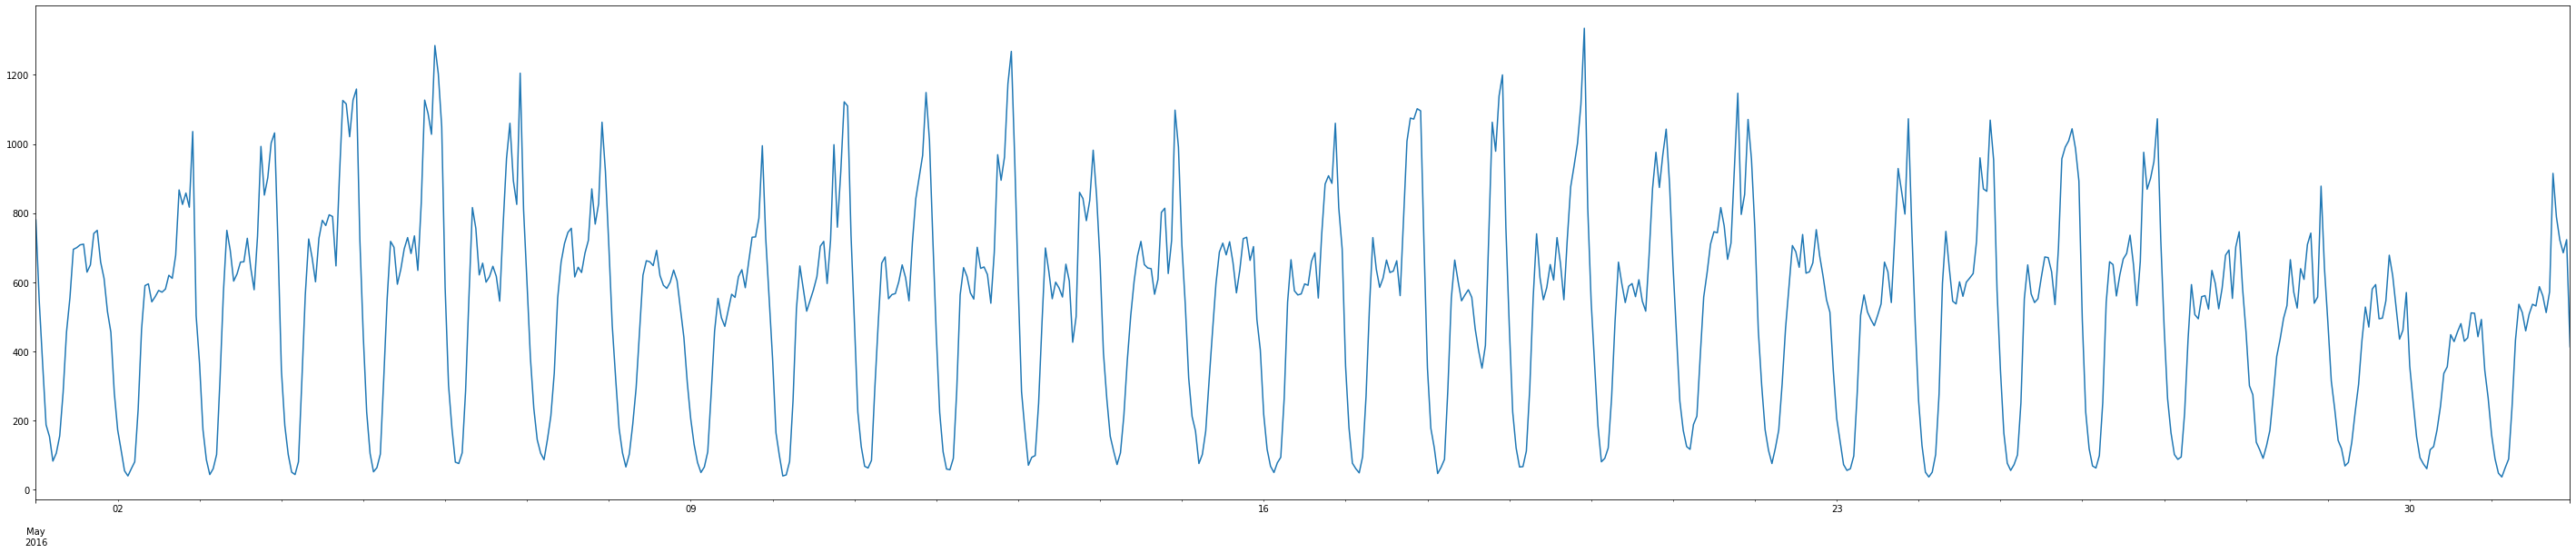

In [30]:
plt.figure(figsize = (50, 10))
data1.iloc[: , a1_reg].plot()

In [31]:
data1.iloc[: , a1_reg]

2016-05-01 00:00:00    780
2016-05-01 01:00:00    545
2016-05-01 02:00:00    363
2016-05-01 03:00:00    187
2016-05-01 04:00:00    153
2016-05-01 05:00:00     82
2016-05-01 06:00:00    105
2016-05-01 07:00:00    155
2016-05-01 08:00:00    281
2016-05-01 09:00:00    456
2016-05-01 10:00:00    555
2016-05-01 11:00:00    695
2016-05-01 12:00:00    700
2016-05-01 13:00:00    708
2016-05-01 14:00:00    710
2016-05-01 15:00:00    629
2016-05-01 16:00:00    650
2016-05-01 17:00:00    741
2016-05-01 18:00:00    750
2016-05-01 19:00:00    658
2016-05-01 20:00:00    611
2016-05-01 21:00:00    515
2016-05-01 22:00:00    455
2016-05-01 23:00:00    280
2016-05-02 00:00:00    172
2016-05-02 01:00:00    114
2016-05-02 02:00:00     54
2016-05-02 03:00:00     39
2016-05-02 04:00:00     60
2016-05-02 05:00:00     80
                      ... 
2016-05-30 18:00:00    511
2016-05-30 19:00:00    510
2016-05-30 20:00:00    442
2016-05-30 21:00:00    492
2016-05-30 22:00:00    345
2016-05-30 23:00:00    264
2

Подсчитаем количество нулевых ячеек час- район.

In [32]:
sum((data1.iloc[: , :] == 0).sum())

1718238

In [33]:
data1.to_csv('c6w1.csv', sep=';', index=True, header=True )